In [1]:

from __future__ import print_function
import os
import sys

import numpy as np
import pandas as pd

import datetime
from math import sqrt
from math import exp
import math
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from keras.layers import Dense,Input, Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras import optimizers
import keras.backend as K


from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import matplotlib.pyplot as plt
from random import gauss
from random import seed
#from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from random import randrange

from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random
from random import gauss
from random import seed
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from scipy.stats.stats import pearsonr    


C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are differen

In [2]:
from datetime import datetime
datetime.now().strftime('%m-%d %H:%M')

'03-25 10:13'

In [6]:
import Experiment_Ready as experim

In [56]:
os.getcwd()

'C:\\Users\\murat.ozemre\\Desktop\\Thesis_Project\\Data_Learning_Prediction\\Result_Plots'

In [90]:
Product_Type_Options = [841810,841840,841850]
Product=Product_Type_Options[2] #841810

Productname=Product
Exp_Country='TUR' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [91]:
#Default values

dependenttype='same'
percent=100
MonthSeries="3"

if Exp_Country=='CHN':
        if Product==841810:
            MonthSeries="_34"
            percent=50
            dependenttype='same'
        elif Product==841840:
            MonthSeries="_345"
            percent=50
            dependenttype='log'
        elif Product==841850:
            MonthSeries="_34"
            percent=100
            dependenttype='log'
elif Exp_Country=='TUR':
        if Product==841810:
            MonthSeries="_67"
            percent=50
            dependenttype='same'
        elif Product==841840:
            MonthSeries="4"
            percent=50
            dependenttype='same'
        elif Product==841850:
            MonthSeries="_45"
            percent=50
            dependenttype='same'


In [92]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')

Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

# For BCG MAtrix Additional Test Set is created for CHN but not for Turkey
if Exp_Country=='CHN':

    X = Data_Core1.parse('X{}_Test'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
elif Exp_Country=='TUR':
    
    X = Data_Core1.parse('X{}'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
    
X.drop(['Date','Year','Month'], axis=1, inplace=True)

X_Column_Names=list(X.columns.values)
n_feature=X.shape[1]

#y=y.iloc[3:]
#X=X.iloc[3:,:]
#Z=Z.iloc[3:,:]




In [93]:
if dependenttype=='same':
    dependent_variable=y
    print("Same Dependent Variable")
elif dependenttype=='log':
    dependent_variable=y.apply(np.log)
    print("Log of Dependent Variable")
elif dependenttype=='sqrt':
    dependent_variable=y.apply(np.sqrt)
    print("SQRT of Dependent Variable")


Same Dependent Variable


In [94]:
# Calculate Feature Importace according Month Series
number_of_split_for_feature=100
# For split take only train test for X

X_train_test_only=X.iloc[:len(y),:]

result=experim.get_feature_importance_result (X_train_test_only,dependent_variable,Z,n_feature,number_of_split_for_feature)
scored_feature_indices=result[0]
feature_score=result[1]

In [95]:
# Omit Features according percentage

percentile=100-percent
threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)

# X for all values
X_threshold=X.iloc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]
  

In [96]:
# Set X train, X test, y train, y test
rs=42 # 841810 -3

values = X.values
values = values.astype('float32')
X_Column_X_Column_Names=X.columns
    
scaler_X= MinMaxScaler(feature_range=(0, 1))

scaled_value_X = scaler_X.fit_transform(values)
scaled_value_X = pd.DataFrame(data=scaled_value_X[:,:])
scaled_value_X.columns=X_Column_X_Column_Names

values = dependent_variable.values
values = values.astype('float32')
values = values.reshape(-1, 1)
    
scaler_y= MinMaxScaler(feature_range=(0, 1))

scaled_value_y = scaler_y.fit_transform(values)
scaled_value_y = pd.DataFrame(data=scaled_value_y)

 

In [97]:
# For split take only train test for X

scaled_value_X_train_test_only=scaled_value_X.iloc[:len(y),:]

X_train, X_test, y_train, y_test = train_test_split(scaled_value_X_train_test_only,scaled_value_y,test_size=0.2,random_state=42,stratify=Z['Month'])

   

In [98]:



# Initialize results
repeats=5
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()




# After Training Show Results

In [102]:

    
if Exp_Country=='CHN':
        if Product==841810:
        
            feat= 'auto'
            min_leaf= 1
            max_leaf= 100
            min_impurity= 1e-06
            min_weight= 1e-05
            est= 1000

            #841810 
            rs=31
            limit=20000  
        elif Product==841840:
            feat= 'auto'
            min_leaf= 2
            max_leaf= 100
            min_impurity= 1e-05
            min_weight= 0.001
            est= 200
   
            rs=51
            limit=2500 

        elif Product==841850:
            feat= 'auto'
            min_leaf= 1
            max_leaf= 200
            min_impurity= 1e-05
            min_weight= 0.01
            est= 200
   
            rs=35
            limit= 5000
elif Exp_Country=='TUR':
        if Product==841810:
            
            feat= 'auto'
            min_leaf= 1
            max_leaf= 300
            min_impurity= 1e-06
            min_weight=0.0001
            est= 1000

            #841810 
            rs=79
            limit=20000  
        elif Product==841840:
            feat= 10
            min_leaf= 5
            max_leaf= 100
            min_impurity= 0.000001 
            min_weight= 0.0001
            est= 5000

            #841810 
            rs=31
            limit=6000  
            
        elif Product==841850:
            feat= 10
            min_leaf= 1 
            max_leaf= 10
            min_impurity= 0.001 
            min_weight=1e-05
            est= 1000

            #841810 
            rs=91
            limit=  5000

    
experim.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    

randomforest rs= 38
randomforest rs= 60
randomforest rs= 74
randomforest rs= 100
randomforest rs= 69


[0.779, 0.76, 0.784, 0.762, 0.767]

In [103]:
result=experim.randomforest(X_train, X_test, y_train, y_test,scaler_y,
                            rand=rs,is_random_fixed='TRUE',dependenttype=dependenttype,
                            est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,
                            min_weight=min_weight,min_impurity=min_impurity)

    
      
rmse_test=result[0][1]
R2_test=result[0][2]
        
rmse_train=result[1][0]
R2_train=result[1][1]

randomforest rs= 91


In [104]:
R2_test

0.787

In [105]:
rfc=RandomForestRegressor(n_estimators=est,
                              min_samples_leaf=min_leaf,
                              random_state =rs,
                              max_features=feat,
                              max_leaf_nodes=max_leaf,
                              min_weight_fraction_leaf =min_weight,
                              min_impurity_decrease=min_impurity
                            )
   
RandomForestRegressor.fit(rfc,X_train,y_train)
    
y_predict_test = rfc.predict(X_test)
y_predict_train = rfc.predict(X_train)
y_predict=rfc.predict(scaled_value_X.iloc[:len(y),:])

if Exp_Country=='CHN':
    y_predict_future=rfc.predict(scaled_value_X.iloc[len(y):,:])

# Inverse for test train and all data
result_test=experim.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'NO',dependenttype)
result_train=experim.inverse_scale_and_graph_Y_predict_and_test(y_predict_train,y_train,scaler_y,'NO',dependenttype)
result_all=experim.inverse_scale_and_graph_Y_predict_and_test(y_predict,scaled_value_y,scaler_y,'NO',dependenttype)


inv_y_train=pd.Series(result_train[4])
inv_y_predict_train=pd.Series(result_train[5])
R2_train=result_train[3]
inv_y_test=pd.Series(result_test[4])
inv_y_predict_test=pd.Series(result_test[5])
R2_test=result_test[3]
inv_y_all=pd.Series(result_all[4])
inv_y_predict_all=pd.Series(result_all[5])
R2_all=result_all[3]

print('R2_train',R2_train, 'R2_test',R2_test,'R2_all',R2_all )

if Exp_Country=='CHN':
    # Inverse for future data
    y_predict_future=y_predict_future.reshape(-1, 1)
    predictions = scaler_y.inverse_transform(y_predict_future)
    inv_y_predict_future=predictions.flatten()
  

    if dependenttype=='same':
        con_y_predict_test=inv_y_predict_future
    elif dependenttype=='log':
        con_y_predict_test=[exp(num) for num in inv_y_predict_future]
    elif dependenttype=='sqrt':
        con_y_predict_test=[num**2 for num in inv_y_predict_future]

    inv_y_predict_future=con_y_predict_test   




R2_train 0.855 R2_test 0.787 R2_all 0.827


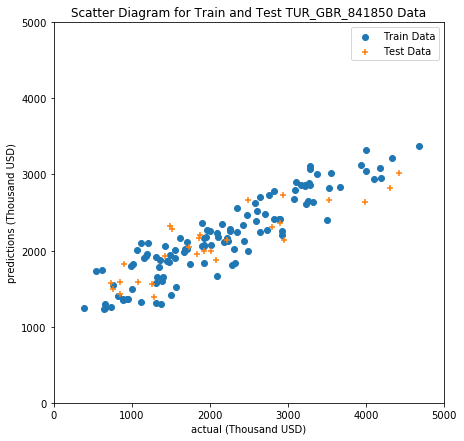

In [106]:

os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction/Result_Plots')
fig = plt.figure(figsize=(7, 7))

plt.scatter(inv_y_train,inv_y_predict_train,label='Train Data')
plt.scatter(inv_y_test,inv_y_predict_test,marker='+' ,label='Test Data')

plt.legend()
plt.xlim(0, limit)
plt.ylim(0, limit)
plt.title("Scatter Diagram for Train and Test {}_{}_{} Data".format(Exp_Country,Imp_Country,Productname))
plt.xlabel("actual (Thousand USD)")
plt.ylabel("predictions (Thousand USD)")
plt.savefig('Scatter Diagram {}_{}_{}.png'.format(Exp_Country,Imp_Country,Productname))
plt.show()



In [107]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = tick_number # int(np.round(2 * value / np.pi))
    
    if N == 1:
        return "200604"
    elif N == 2:
        return "200712"
    elif N == 3:
        return "200908"
    elif N ==4: 
        return "201104"
    elif N == 5:
        return "201212"
    elif N == 6:
        return "201408"
    elif N == 7: 
        return "201604"
    elif N == 8: 
        return "201712"
    else:
        return ""

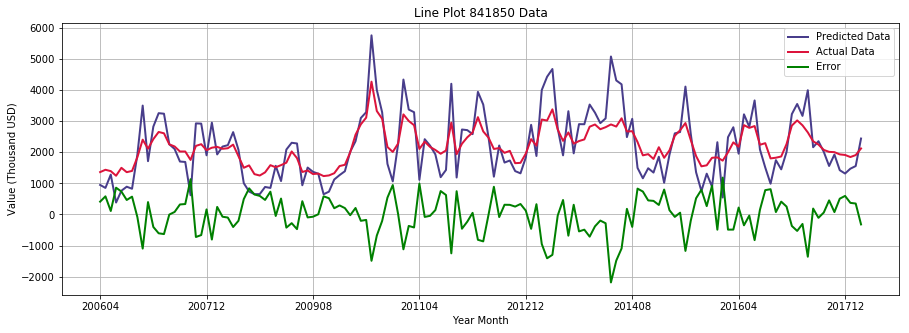

In [108]:
predict=inv_y_all
real=inv_y_predict_all

error=real-predict


fig = plt.figure(figsize=(15, 5))

ax = plt.axes()
x = Z['Date']
xi = [i for i in range(0, len(x))]


ax.plot(xi, predict, lw=2, color='darkslateblue',label='Predicted Data')
ax.plot(xi, real, lw=2, color='crimson', label='Actual Data')

ax.plot(xi, error, lw=2, color='green', label='Error')

# Set up grid, legend, and limits
ax.grid(True)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.legend(frameon=True)
plt.title("Line Plot {} Data".format(Productname))
plt.xlabel('Year Month')
plt.ylabel('Value (Thousand USD)') 

plt.savefig('Line Plot {}_{}_{}.png'.format(Exp_Country,Imp_Country,Productname))

In [ ]:
inv_y_all.iloc[138:]

In [ ]:
inv_y_predict_future

In [ ]:
# 841810
#141    13139.621904
#142    12722.146073
#143    12152.009882
# [12869, 12334, 12427 ]
# 841840
#140    1820.114674
#141    1741.121139
#142    1653.749971
#143    1566.685755
#[1707, 1650, 1573]
# 841850
#141    2927.422839
#142    3222.260451
#143    3361.269723
# [3329, 3280, 3436]